# TP BE Météo

## Chargement des données

Lessgo

In [ ]:
library(sf)
library(ggplot2)
library("rnaturalearth")
library("rnaturalearthdata")
library(dplyr)

In [ ]:
# 31s à s'exécuter sur Stuart
data_full = "../data/donnees-synop-essentielles-omm.csv"
data_ext10 = "../data/donnees_extracted_10.csv"

full_data <- read.csv(data_ext10, 
            sep=",", 
            na.string=c("","null","NaN"),
            header=TRUE, 
            stringsAsFactors=TRUE) # SI IL Y A DES PROBLÈMES BIZARRES PLUS LOIN, METTRE À FALSE

In [ ]:
summary(full_data)
# RQE : le read_csv remplace les ' ' par des '.' dans les titres des colonnes

colnames(full_data)
# affiche les numéros de sttaions choisies
stations_in_file = unique(unlist(full_data["ID.OMM.station"]))
print(stations_in_file)

In [ ]:
# hardcoded directories
data_dir <- "../data/"
mesures_dir <-  paste(data_dir, "mesures/", sep="")
stations_csv <- paste(data_dir, "stations.csv", sep="")

stations_df <- read.csv(stations_csv, 
            sep=",", 
            na.string=c("","null","NaN"),
            header=TRUE, 
            stringsAsFactors=FALSE)

colnames(stations_df)

In [ ]:

my_sf <- st_as_sf(stations_df, coords = c('Longitude', 'Latitude'))

#Plot without world map:

ggplot(my_sf) + 
  geom_sf(aes(color = 'red'))


[1] "sf"         "data.frame"

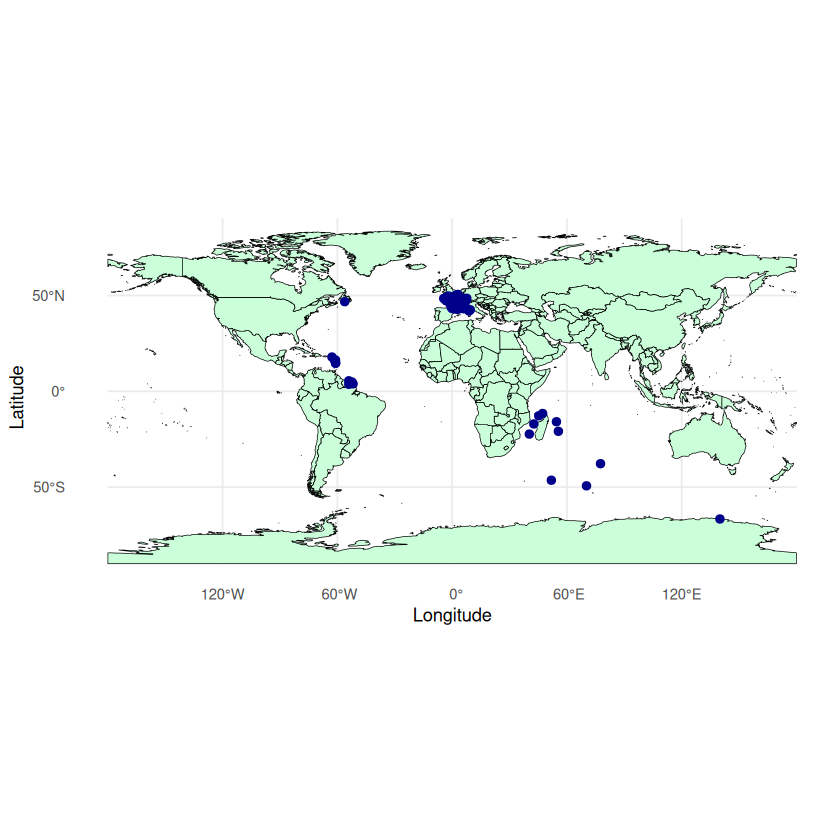

In [56]:

worldmap <- ne_countries(scale = 'medium', type = 'map_units',
                         returnclass = 'sf')
class(worldmap)


ggplot() +
  geom_sf(data = worldmap, color = "black", fill = "#CAFFDA") +
  geom_point(data = stations_df, aes(x = Longitude, y = Latitude), color = "darkblue", size = 2) +
  coord_sf() +
  theme_minimal()

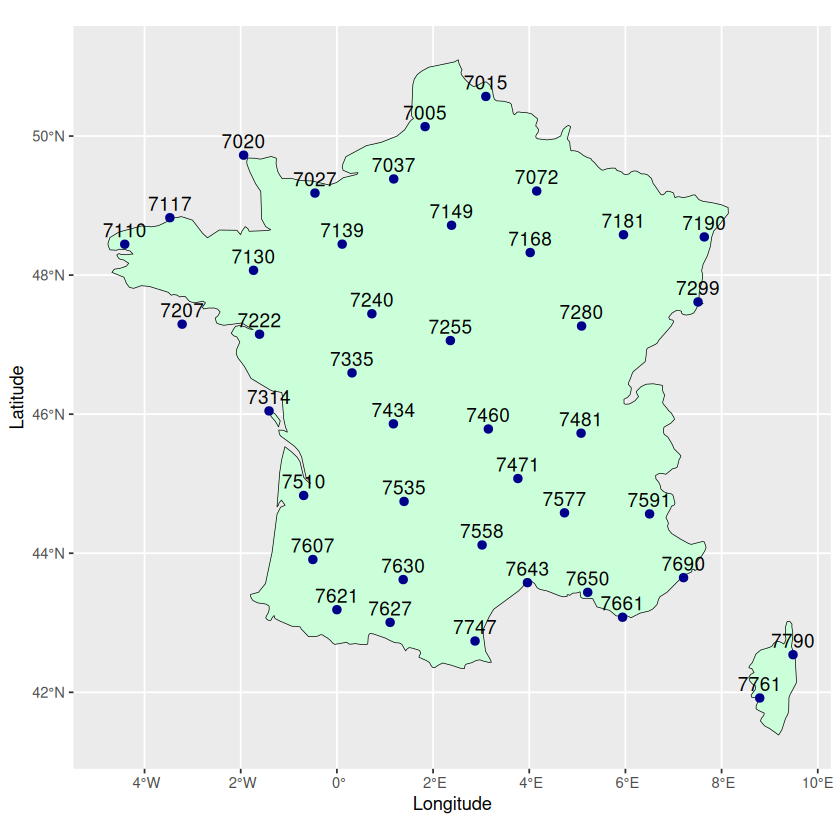

In [60]:
ggplot() +
  geom_sf(data = worldmap[worldmap$name == 'France',], color = "black", fill = "#CAFFDA") +
  geom_point(data = stations_df[stations_df$Longitude > -10 & stations_df$Longitude < 10, ], 
            aes(x = Longitude, y = Latitude), 
            color = "darkblue", size = 2) +
  coord_sf() +
  geom_text(data = stations_df[stations_df$Longitude > -10 & stations_df$Longitude < 10, ],
              aes(x = Longitude, y = Latitude, label = ID.OMM.station),
              size = 4, color = "black", nudge_y = 0.2) # Adjust nudge_y to avoid overlap  theme_minimal()

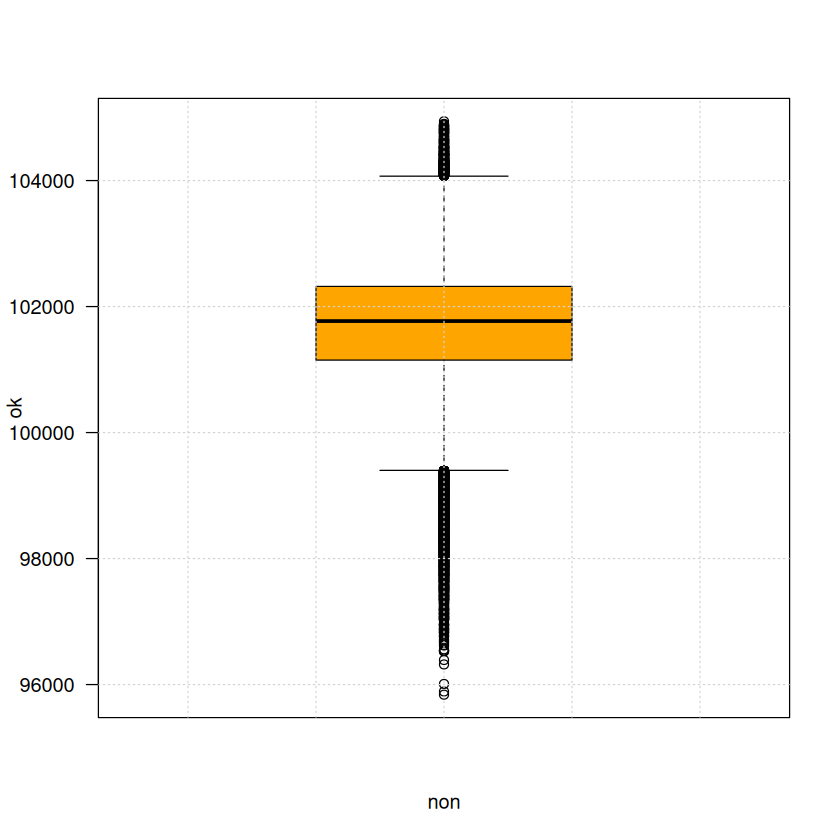

In [69]:
histogramggplot <- function(xs, title, legx, legy ){
    ggplot(xs, aes(x=legx, y=legy, fill=legx)) +
    geom_boxplot() +
    theme_light() +
    scale_fill_brewer("Set3")
}

histogram <- function(xs, title, legx, legy){
    my_colors <- c("#FFA500", "#008000", "#1E90FF", "#FF1493")
    tryCatch(
        {
        par(bg = 'white')
        boxplot(xs, xlab = legx, ylab = legy, las = 1, col = my_colors)
        grid()
        },
        error=function(e) {
            message('An error occurred (in histogram function)')
            print("with title")
            print(e)
        })
    
}

chosen_stations = c("7020", "7015", "7027")
histogram(xs = full_data["Pression.au.niveau.mer"], title = "oui" ,legx = "non" ,legy = "ok")

In [66]:

"
Return columns required, with only the rows related to chosen_stations.
"
ColumnSelector <- function(columns, chosen_stations){
    return( select(full_data %>% filter(ID.OMM.station %in% chosen_stations), all_of(columns)) )
}




[1] "\nReturn columns required, with only the rows related to chosen_stations.\n"

In [67]:
ColumnSplitSelector <- function(column, chosen_stations) {
    selections <- list()
    i = 1
    max_length <- 0

    # First pass: find the maximum length
    for (s in chosen_stations) {
        vec <- full_data %>%
            filter(ID.OMM.station == s) %>%
            pull({{column}})
        selections[[i]] <- vec
        max_length <- max(max_length, length(vec))
        i <- i + 1
    }
    # Second pass: pad each vector with NA to max_length
    for (j in seq_along(selections)) {
        if (length(selections[[j]]) < max_length) {
            selections[[j]] <- c(selections[[j]], rep(NA, max_length - length(selections[[j]])))
        }
    }
    # Combine
    df <- do.call(cbind, selections)
    colnames(df) <- chosen_stations
    colnames(df) <- paste("Station", colnames(df), sep = "_")
    return(as.data.frame(df))
}

# histogramme sur sélection auto
autohistogram <- function(column, chosen_stations){
    titlec = gsub("[[:punct:]]", " ", column)
    df_extract_cs = ColumnSplitSelector(column, chosen_stations)
    histogram(xs = df_extract_cs, legx = "Selected stations" ,legy = column)
    title(titlec)
}


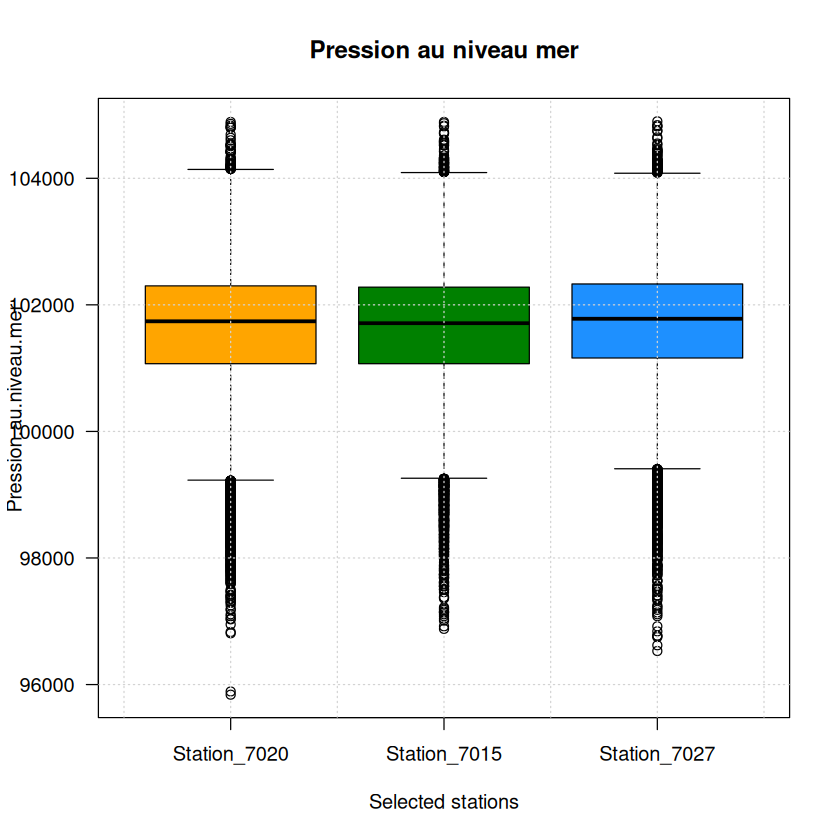

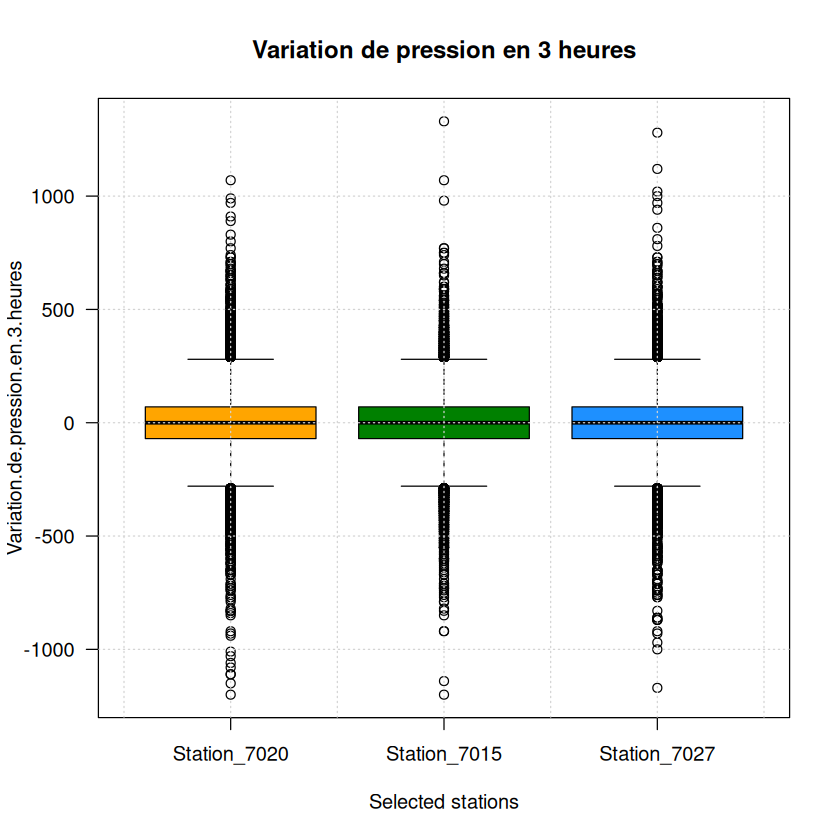

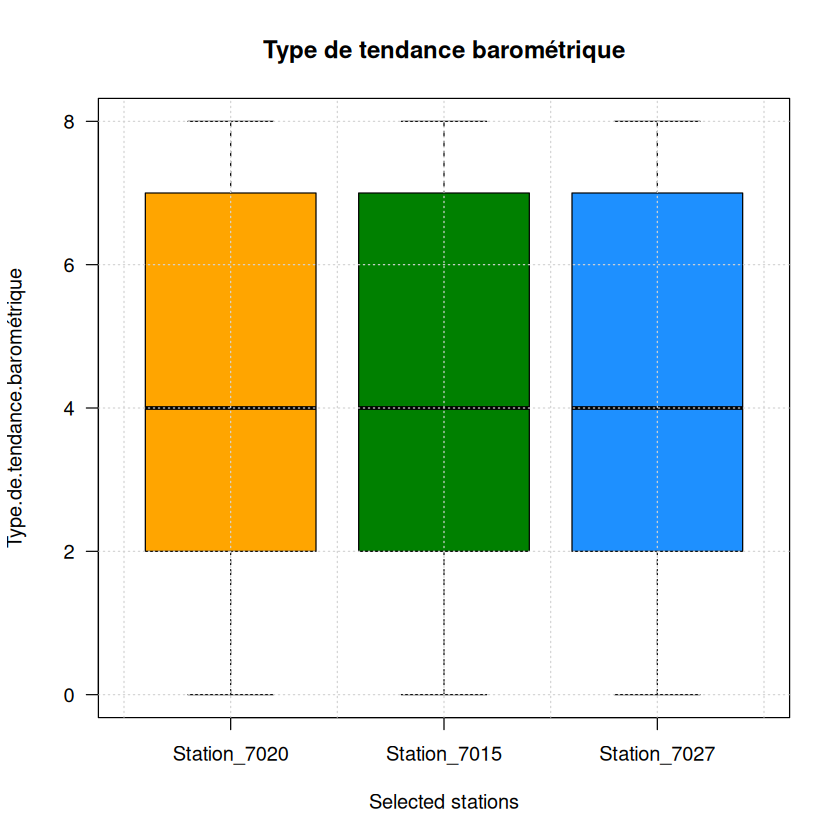

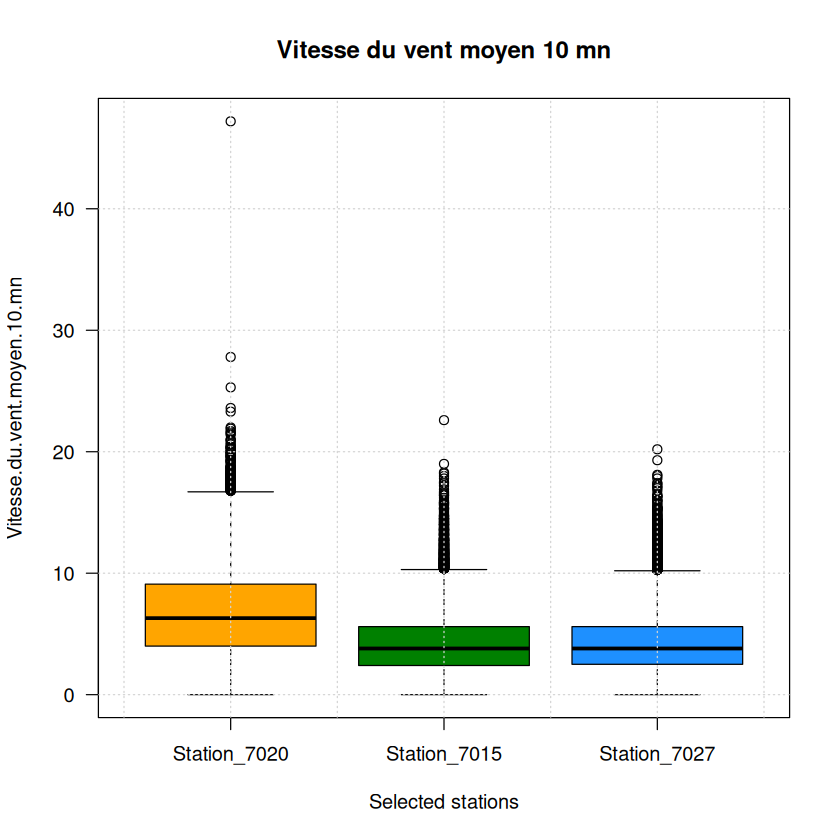

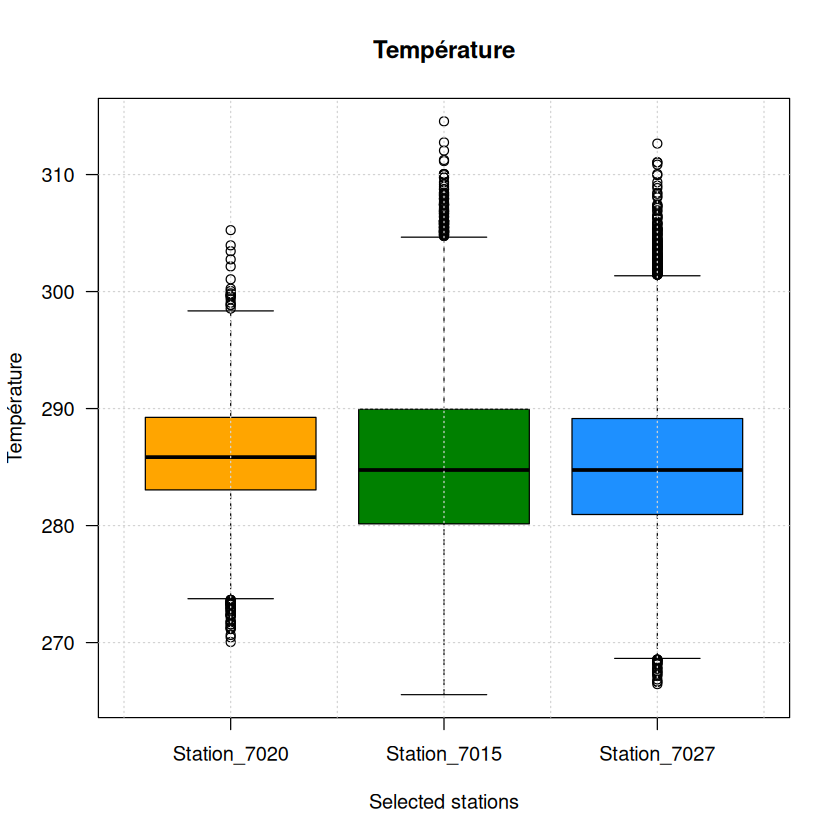

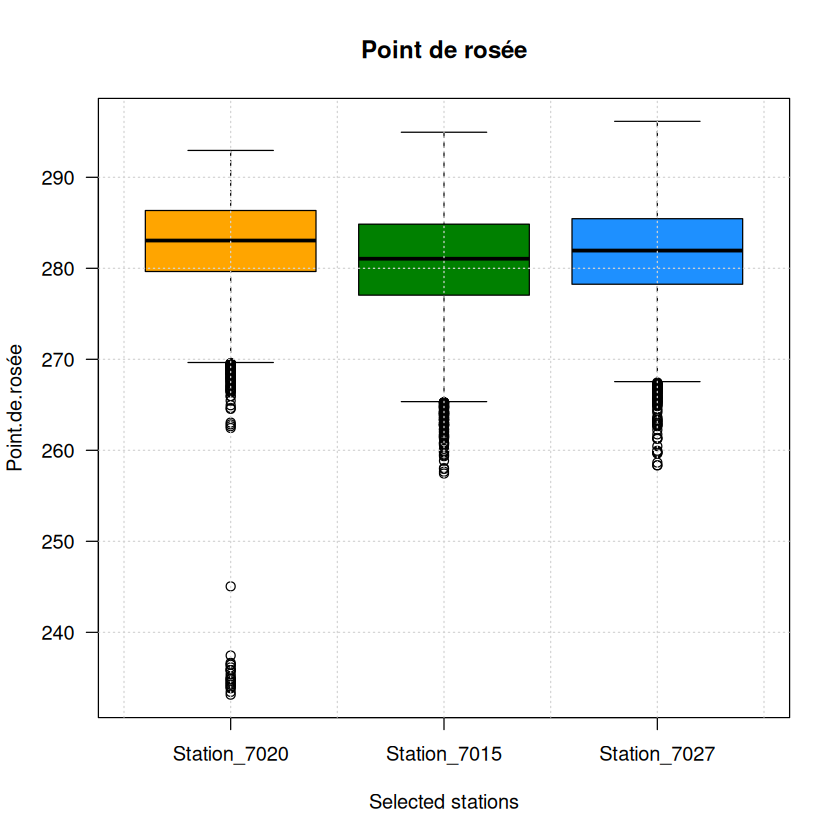

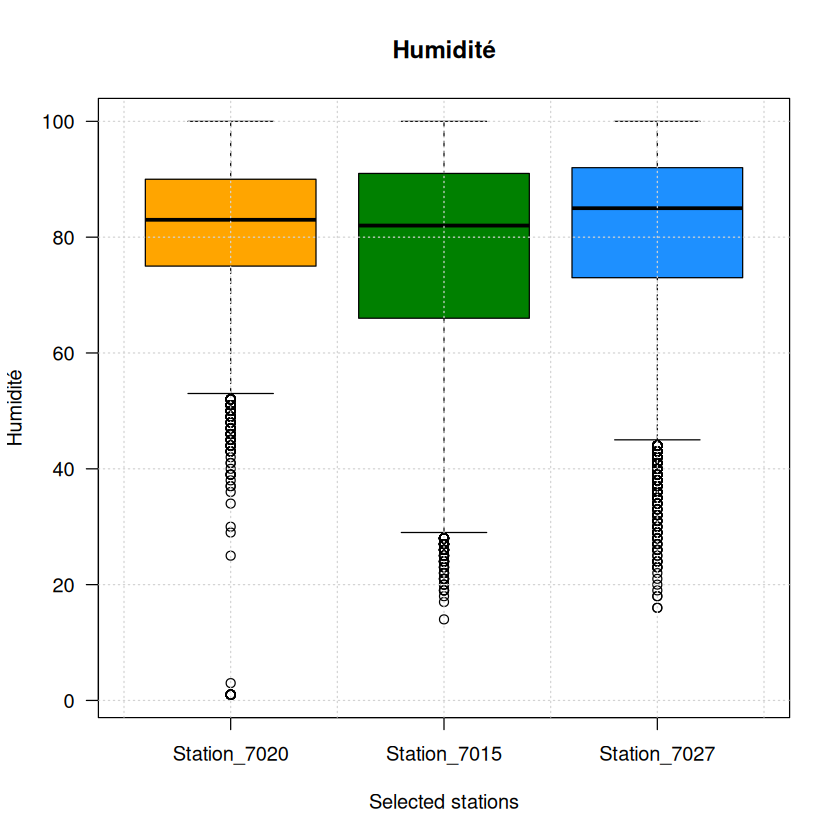

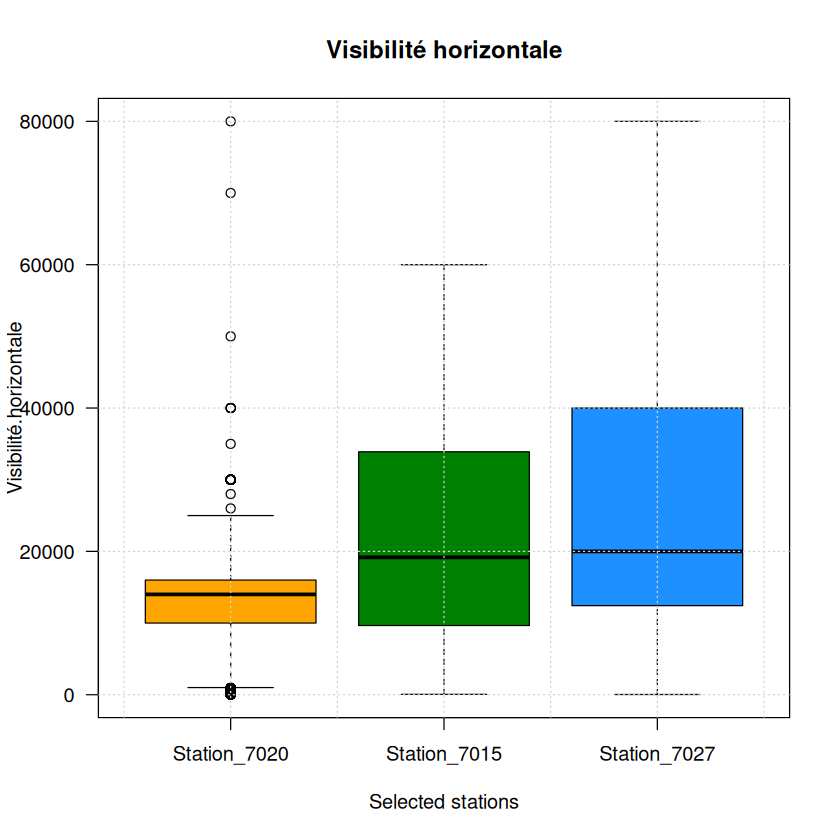

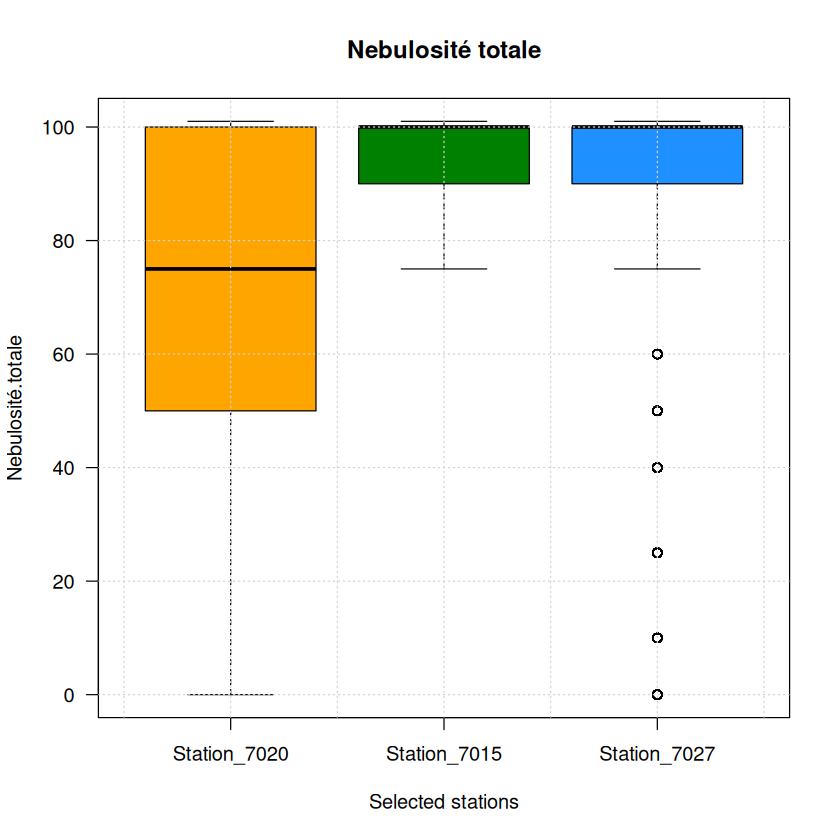

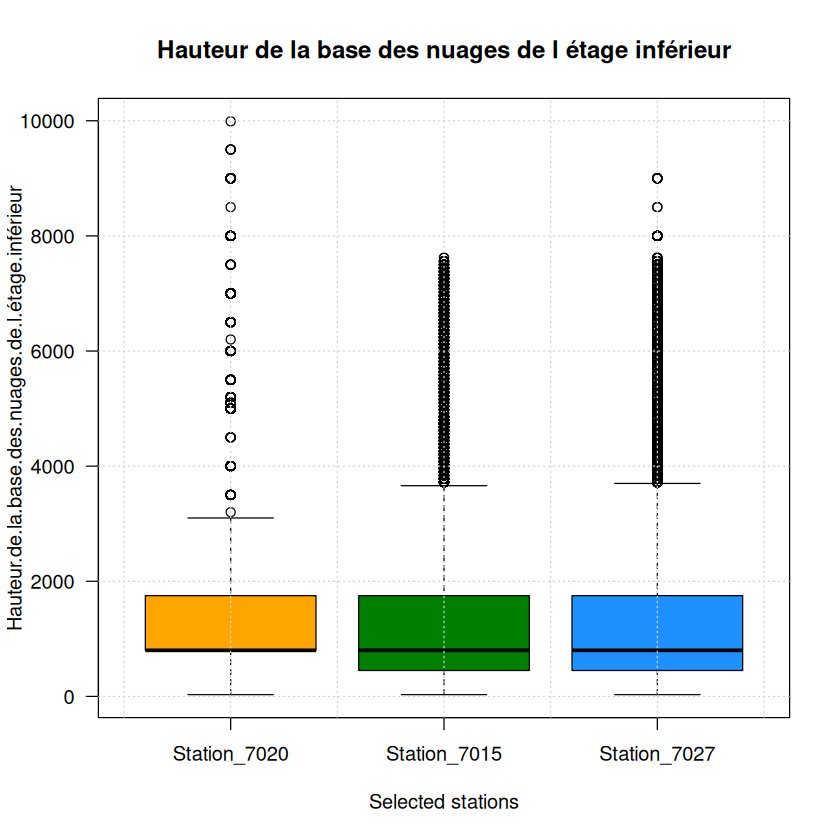

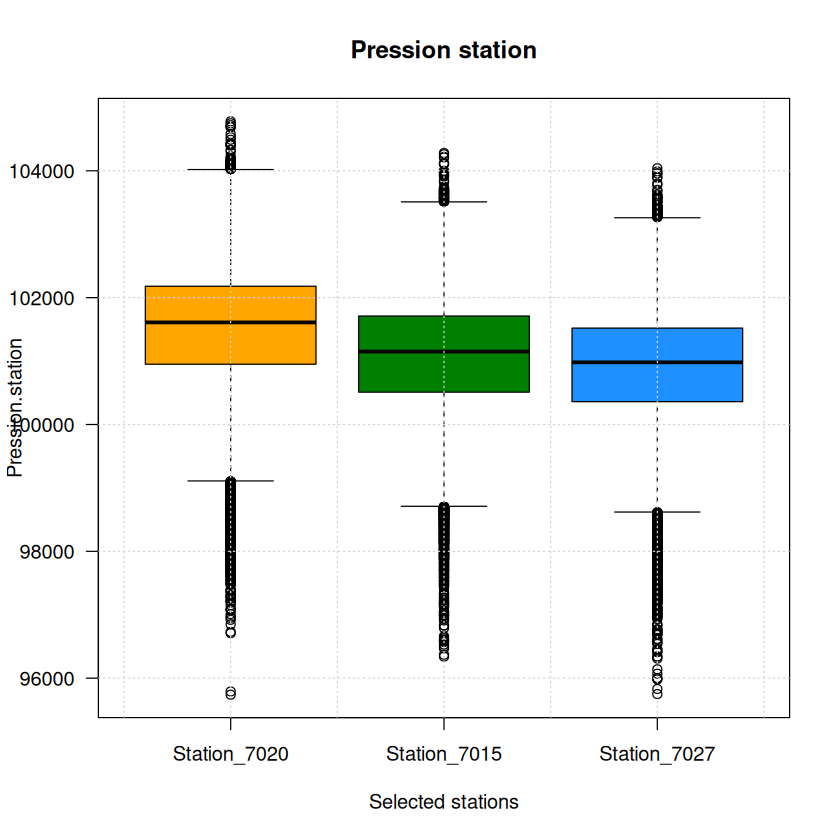

Warning message in min(x):
“no non-missing arguments to min; returning Inf”
Warning message in max(x):
“no non-missing arguments to max; returning -Inf”


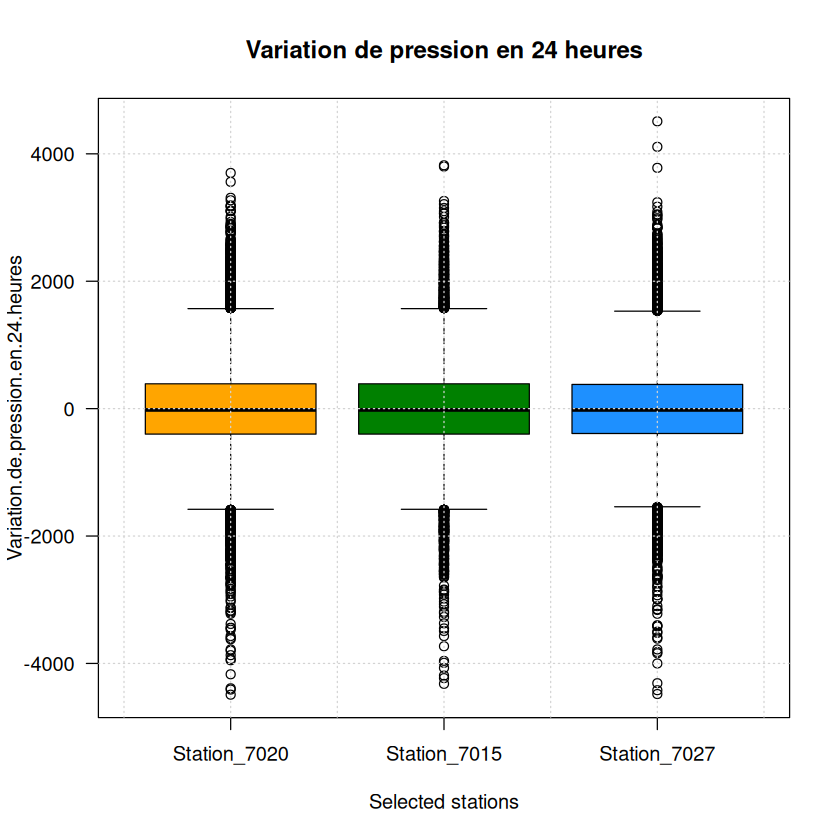

An error occurred (in histogram function)



[1] "with title"
<simpleError in plot.window(xlim = xlim, ylim = ylim, log = log, yaxs = pars$yaxs): need finite 'ylim' values>


Warning message in min(x):
“no non-missing arguments to min; returning Inf”
Warning message in max(x):
“no non-missing arguments to max; returning -Inf”
An error occurred (in histogram function)



[1] "with title"
<simpleError in plot.window(xlim = xlim, ylim = ylim, log = log, yaxs = pars$yaxs): need finite 'ylim' values>


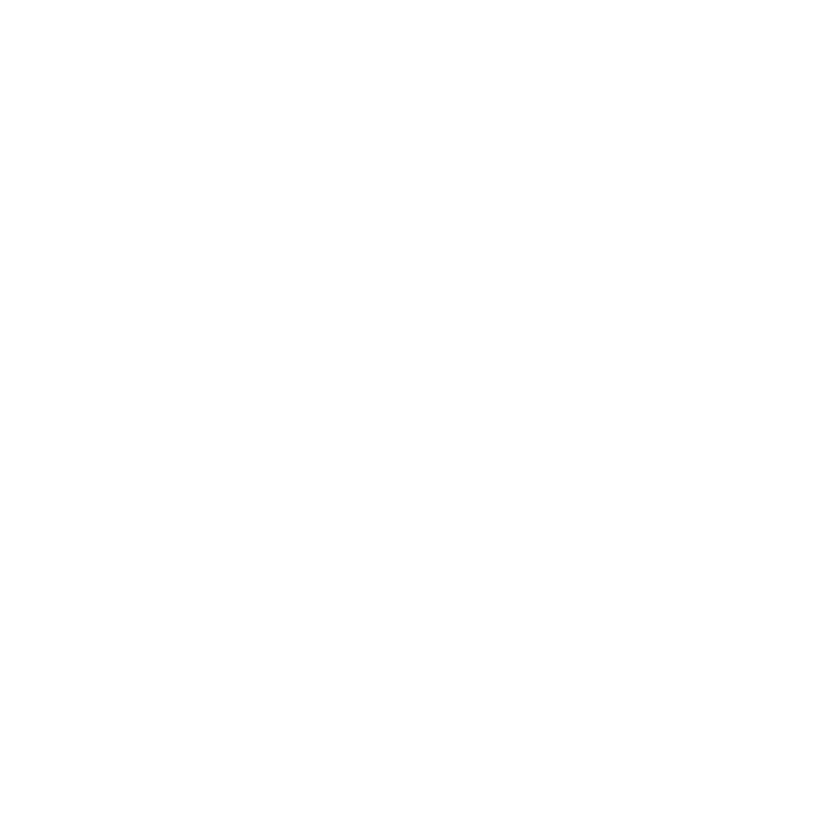

In [70]:
autohistogram("Pression.au.niveau.mer", chosen_stations)
autohistogram("Variation.de.pression.en.3.heures", chosen_stations)
autohistogram("Type.de.tendance.barométrique", chosen_stations)
autohistogram("Vitesse.du.vent.moyen.10.mn", chosen_stations)
autohistogram("Température", chosen_stations)
autohistogram("Point.de.rosée", chosen_stations)
autohistogram("Humidité", chosen_stations)
autohistogram("Visibilité.horizontale", chosen_stations)
autohistogram("Nebulosité.totale", chosen_stations)
autohistogram("Hauteur.de.la.base.des.nuages.de.l.étage.inférieur", chosen_stations)
autohistogram("Pression.station", chosen_stations)

# autohistogram("Géopotentiel", chosen_stations) fonctionne pas
autohistogram("Variation.de.pression.en.24.heures", chosen_stations)
autohistogram("Température.minimale.sur.24.heures", chosen_stations)
autohistogram("Température.maximale.sur.24.heures", chosen_stations)


In [ ]:
autohistogram("", chosen_stations)
autohistogram("", chosen_stations)
autohistogram("", chosen_stations)


